In [39]:
import os
import pandas as pd
from scipy.stats import kendalltau, spearmanr
import matplotlib.pyplot as plt
from dotenv import load_dotenv


In [40]:



def evaluate_top_10_percent(csv_path):
    """
    Evaluate MAP, Kendall's Tau, and Spearman Rank Correlation for the top 10% of data in a CSV.

    Args:
        csv_path (str): Path to the CSV file containing `Node_Index`, `Label`, and `Prediction`.

    Returns:
        dict: A dictionary containing `map`, `kendall_tau`, and `spearman_corr` for the top 10%.
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Sort by Predictions in descending order
    df_sorted = df.sort_values(by='Prediction', ascending=False)

    # Select the top 10% of the data
    top_10_percent = int(len(df_sorted) * 0.1)
    df_top_10 = df_sorted.head(top_10_percent)

    # Compute Mean Average Precision (MAP)
    def compute_map(labels):
        threshold = df['Label'].quantile(0.9)  # Top 20% most influential nodes
        relevance = [1 if label > threshold else 0 for label in labels]  # Binary relevance: 1 if relevant, else 0
        cumsum = 0
        total_relevant = sum(relevance)
        if total_relevant == 0:
            return 0.0  # Avoid division by zero if no relevant items
        for i, rel in enumerate(relevance, start=1):
            if rel:
                cumsum += sum(relevance[:i]) / i
        return cumsum / total_relevant

    # MAP for the top 10%
    map_top_10 = compute_map(df_top_10['Label'])

    # Kendall's Tau and Spearman Rank Correlation
    kendall_tau, _ = kendalltau(df_top_10['Label'], df_top_10['Prediction'])
    spearman_corr, _ = spearmanr(df_top_10['Label'], df_top_10['Prediction'])

    # Return the results as a dictionary
    return {
        'map': map_top_10,
        'kendall_tau': kendall_tau,
        'spearman_corr': spearman_corr
    }


# parameters
load_dotenv("./model.env")
sir_alpha = int(os.getenv("SIR_ALPHA"))
print('SIR_ALPHA: ', sir_alpha)
_model_L  = int(os.getenv("_MODEL_L"))
print('_MODEL_L: ', _model_L)
num_epochs = int(os.getenv("NUM_EPOCH"))
print('NUM_EPOCH: ', num_epochs)

save_folder = f'test_L{_model_L}_b4_sir{sir_alpha}'


# Example usage

csv_path = f'./../data/{save_folder}/ba_edgelist_exp1_5000_4_df.csv'  # Replace with the actual path
results = evaluate_top_10_percent(csv_path)
print(f"MAP: {results['map']:.4f}")
print(f"Kendall's Tau: {results['kendall_tau']:.4f}")
print(f"Spearman Rank Correlation: {results['spearman_corr']:.4f}")


SIR_ALPHA:  2
_MODEL_L:  15
NUM_EPOCH:  150
MAP: 0.7492
Kendall's Tau: 0.5115
Spearman Rank Correlation: 0.6943


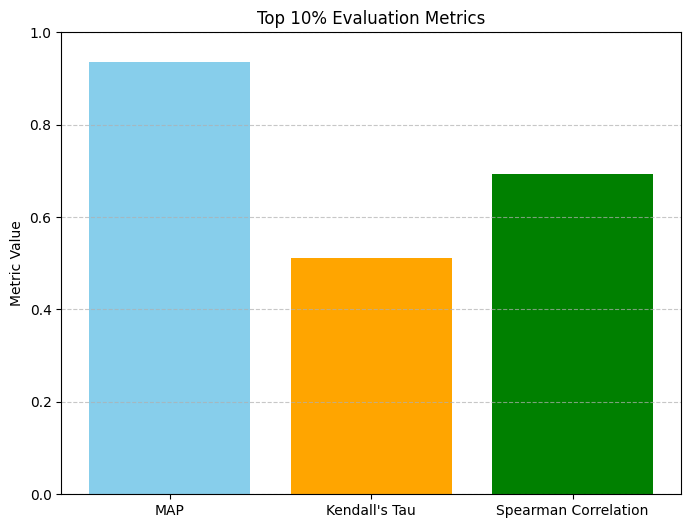

Results: {'MAP': 0.9359253917750773, "Kendall's Tau": 0.5115202844951415, 'Spearman Correlation': 0.6942767751612651}


In [41]:
import pandas as pd
from scipy.stats import kendalltau, spearmanr
import matplotlib.pyplot as plt

def evaluate_and_plot_top_10_percent(csv_path):
    """
    Evaluate MAP, Kendall's Tau, and Spearman Rank Correlation for the top 10% of data in a CSV
    and plot the results.

    Args:
        csv_path (str): Path to the CSV file containing `Node_Index`, `Label`, and `Prediction`.

    Returns:
        dict: A dictionary containing `map`, `kendall_tau`, and `spearman_corr` for the top 10%.
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Sort by Predictions in descending order
    df_sorted = df.sort_values(by='Prediction', ascending=False)

    # Select the top 10% of the data
    top_10_percent = int(len(df_sorted) * 0.1)
    df_top_10 = df_sorted.head(top_10_percent)

    # Compute Mean Average Precision (MAP)
    def compute_map(labels):
        threshold = df['Label'].quantile(0.8)  # Top 20% most influential nodes
        relevance = [1 if label > threshold else 0 for label in labels]  # Binary relevance: 1 if relevant, else 0
        cumsum = 0
        total_relevant = sum(relevance)
        if total_relevant == 0:
            return 0.0  # Avoid division by zero if no relevant items
        for i, rel in enumerate(relevance, start=1):
            if rel:
                cumsum += sum(relevance[:i]) / i
        return cumsum / total_relevant

    # MAP for the top 10%
    map_top_10 = compute_map(df_top_10['Label'])

    # Kendall's Tau and Spearman Rank Correlation
    kendall_tau, _ = kendalltau(df_top_10['Label'], df_top_10['Prediction'])
    spearman_corr, _ = spearmanr(df_top_10['Label'], df_top_10['Prediction'])

    # Store results in a dictionary
    results = {
        'MAP': map_top_10,
        'Kendall\'s Tau': kendall_tau,
        'Spearman Correlation': spearman_corr
    }

    # Plotting the results
    metrics = list(results.keys())
    values = list(results.values())

    plt.figure(figsize=(8, 6))
    plt.bar(metrics, values, color=['skyblue', 'orange', 'green'])
    plt.ylabel("Metric Value")
    plt.title("Top 10% Evaluation Metrics")
    plt.ylim(0, 1)  # Since these metrics range between 0 and 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return results

# Example usage
csv_path = f'./../data/{save_folder}/ba_edgelist_exp1_5000_4_df.csv'  # Replace with the actual path
results = evaluate_and_plot_top_10_percent(csv_path)
print(f"Results: {results}")


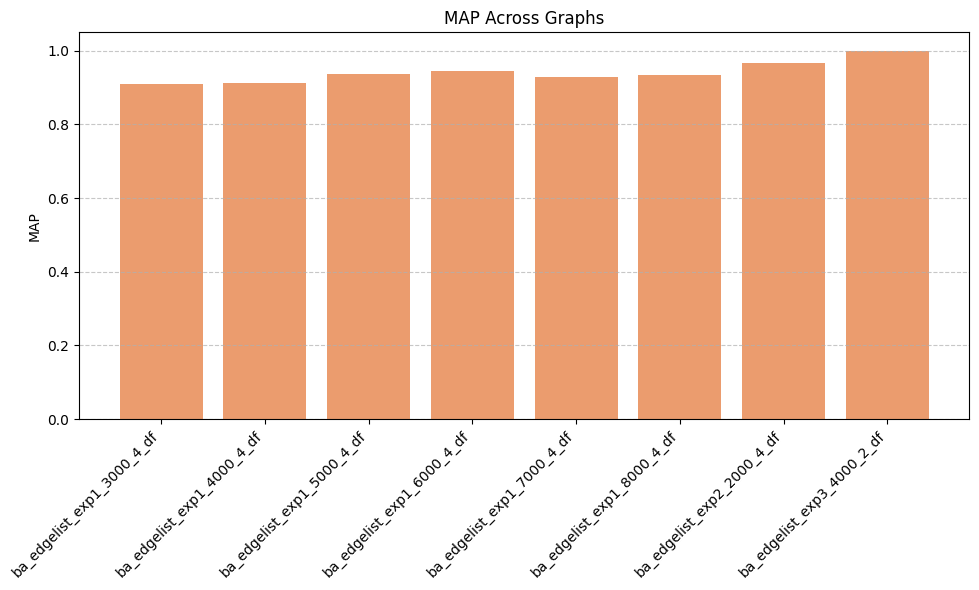

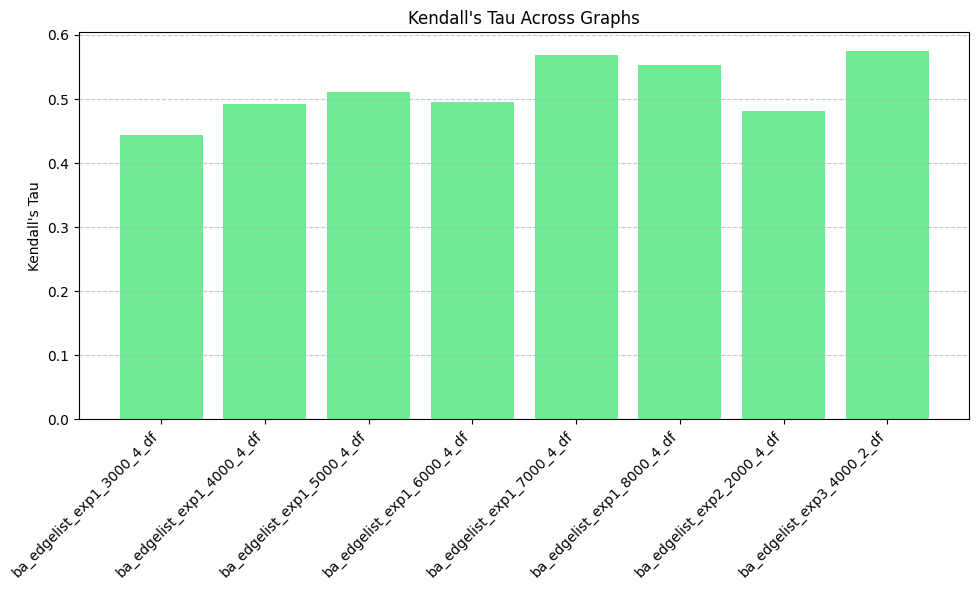

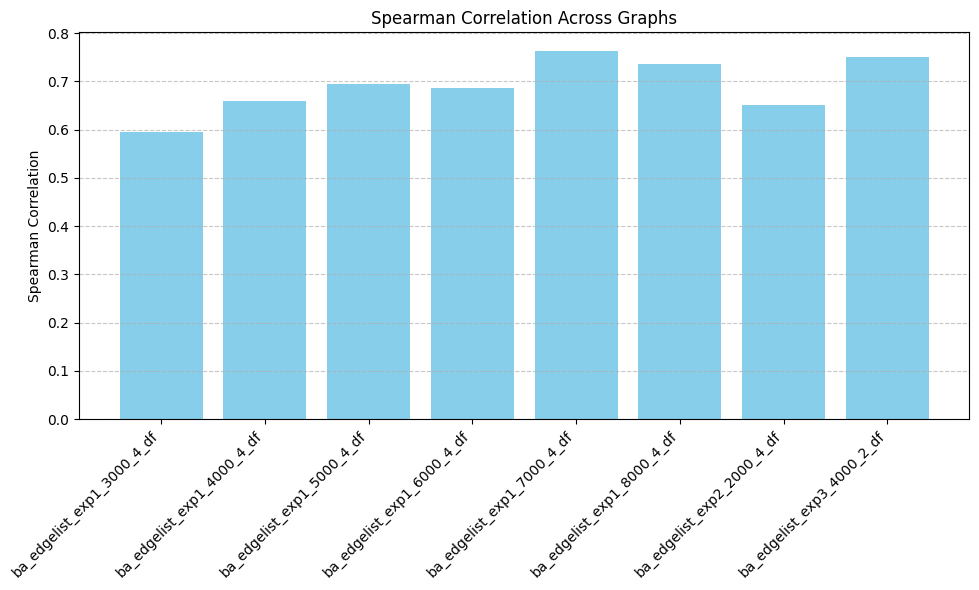

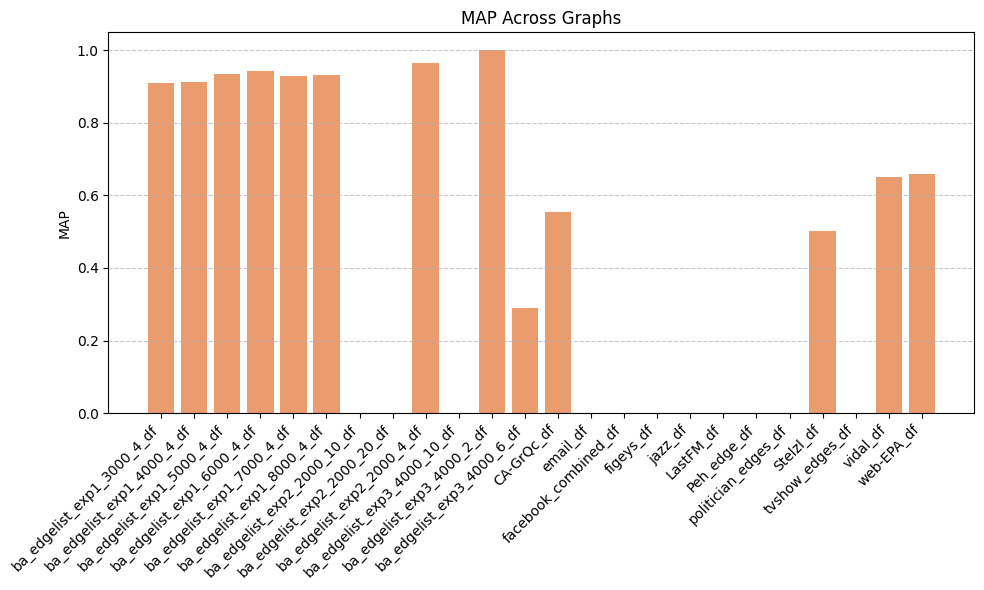

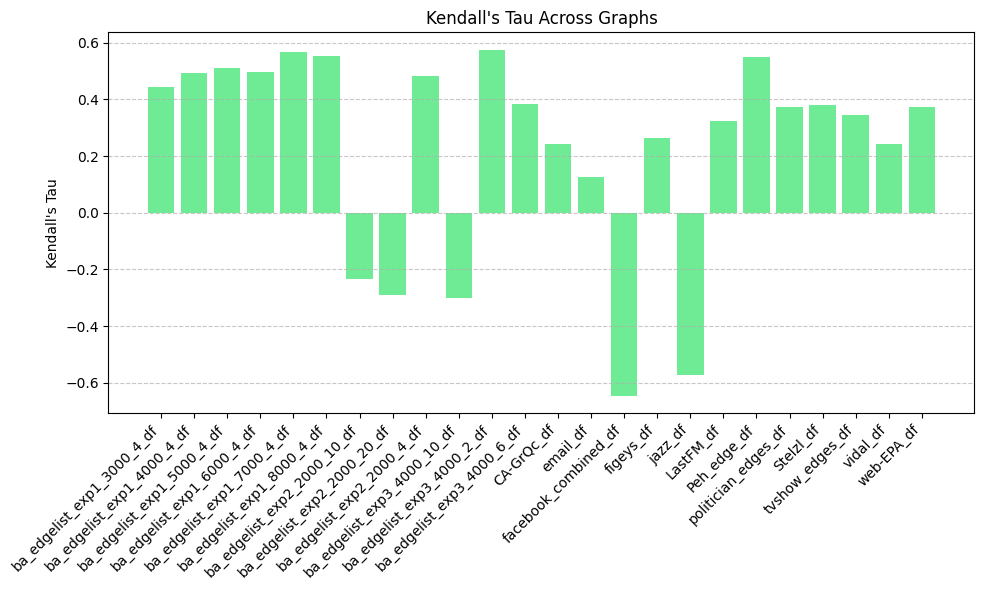

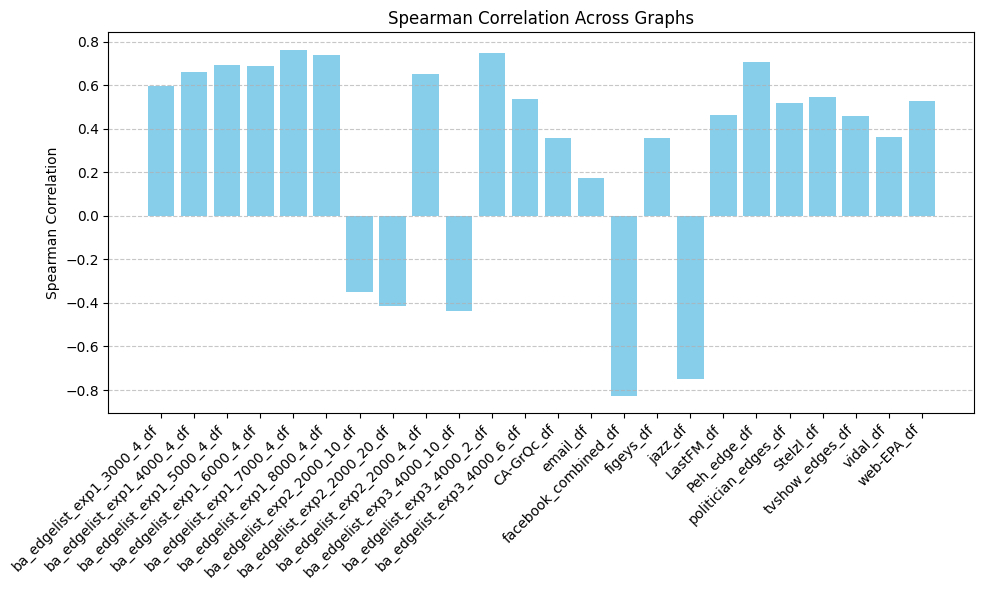

                          Graph       MAP  Kendall's Tau  Spearman Correlation
0    ba_edgelist_exp1_3000_4_df  0.909105       0.444291              0.595316
1    ba_edgelist_exp1_4000_4_df  0.912950       0.492278              0.658629
2    ba_edgelist_exp1_5000_4_df  0.935925       0.511520              0.694277
3    ba_edgelist_exp1_6000_4_df  0.944592       0.495991              0.685985
4    ba_edgelist_exp1_7000_4_df  0.930027       0.568490              0.763253
5    ba_edgelist_exp1_8000_4_df  0.932847       0.553508              0.736798
6   ba_edgelist_exp2_2000_10_df  0.000000      -0.234584             -0.351746
7   ba_edgelist_exp2_2000_20_df  0.000000      -0.290858             -0.414082
8    ba_edgelist_exp2_2000_4_df  0.965577       0.481403              0.650532
9   ba_edgelist_exp3_4000_10_df  0.000000      -0.302267             -0.436632
10   ba_edgelist_exp3_4000_2_df  1.000000       0.575378              0.749287
11   ba_edgelist_exp3_4000_6_df  0.289167       0.38

In [42]:


def analyze_and_plot_metrics_in_folder(folder_path, rmv_graphs=[]):
    """
    Analyze and plot MAP, Kendall's Tau, and Spearman Rank Correlation for all CSVs in a folder.

    Args:
        folder_path (str): Path to the folder containing CSV files.

    Returns:
        pd.DataFrame: A DataFrame containing the metrics for all graphs.
    """
    # Get all CSV file paths in the folder
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
    graph_names = [os.path.splitext(os.path.basename(f))[0] for f in csv_files]

    # Initialize a list to store results
    results = []

    for csv_path, graph_name in zip(csv_files, graph_names):
        if graph_name in rmv_graphs:
            continue
        # Load the CSV file
        df = pd.read_csv(csv_path)

        # Sort by Predictions in descending order
        df_sorted = df.sort_values(by='Prediction', ascending=False)

        # Select the top 10% of the data
        top_10_percent = int(len(df_sorted) * 0.1)
        df_top_10 = df_sorted.head(top_10_percent)

        # Compute Mean Average Precision (MAP)
        def compute_map(labels):
            threshold = df['Label'].quantile(0.8)  # Top 20% most influential nodes
            relevance = [1 if label > threshold else 0 for label in labels]  # Binary relevance: 1 if relevant, else 0
            cumsum = 0
            total_relevant = sum(relevance)
            if total_relevant == 0:
                return 0.0  # Avoid division by zero if no relevant items
            for i, rel in enumerate(relevance, start=1):
                if rel:
                    cumsum += sum(relevance[:i]) / i
            return cumsum / total_relevant

        map_top_10 = compute_map(df_top_10['Label'])

        # Kendall's Tau and Spearman Rank Correlation
        kendall_tau, _ = kendalltau(df_top_10['Label'], df_top_10['Prediction'])
        spearman_corr, _ = spearmanr(df_top_10['Label'], df_top_10['Prediction'])

        # Append the results for this graph
        results.append({
            'Graph': graph_name,
            'MAP': map_top_10,
            'Kendall\'s Tau': kendall_tau,
            'Spearman Correlation': spearman_corr
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Plot each metric
    metrics = ['MAP', 'Kendall\'s Tau', 'Spearman Correlation']
    metric_colors = {'MAP':'#eb9c6e', 'Kendall\'s Tau':'#6eeb94', 'Spearman Correlation': 'skyblue'}
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        plt.bar(results_df['Graph'], results_df[metric], color=metric_colors[metric])
        plt.ylabel(metric)
        plt.title(f"{metric} Across Graphs")
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    return results_df


folder_path = f'./../data/{save_folder}'  # Replace with your actual folder path
rmv_graphs= ['ba_edgelist_exp2_2000_10_df' , 'ba_edgelist_exp2_2000_20_df', 'ba_edgelist_exp3_4000_10_df', 'ba_edgelist_exp3_4000_6_df', 'web-EPA_df', 'email_df', 'facebook_combined_df','CA-GrQc_df', 'jazz_df', 'figeys_df', 'LastFM_df', 'Peh_edge_df', 'politician_edges_df', 'Stelzl_df', 'tvshow_edges_df', 'vidal_df']
results_df = analyze_and_plot_metrics_in_folder(folder_path, rmv_graphs)
results_df = analyze_and_plot_metrics_in_folder(folder_path)
print(results_df)


In [43]:
avg_map = results_df['MAP'].mean()
avg_kendall_tau = results_df["Kendall's Tau"].mean()
avg_spearman_corr = results_df['Spearman Correlation'].mean()

# Print the average values
print(f"Average MAP: {avg_map}")
print(f"Average Kendall's Tau: {avg_kendall_tau}")
print(f"Average Spearman Correlation: {avg_spearman_corr}")

Average MAP: 0.4244294810952602
Average Kendall's Tau: 0.2367972991830473
Average Spearman Correlation: 0.3236246865702707


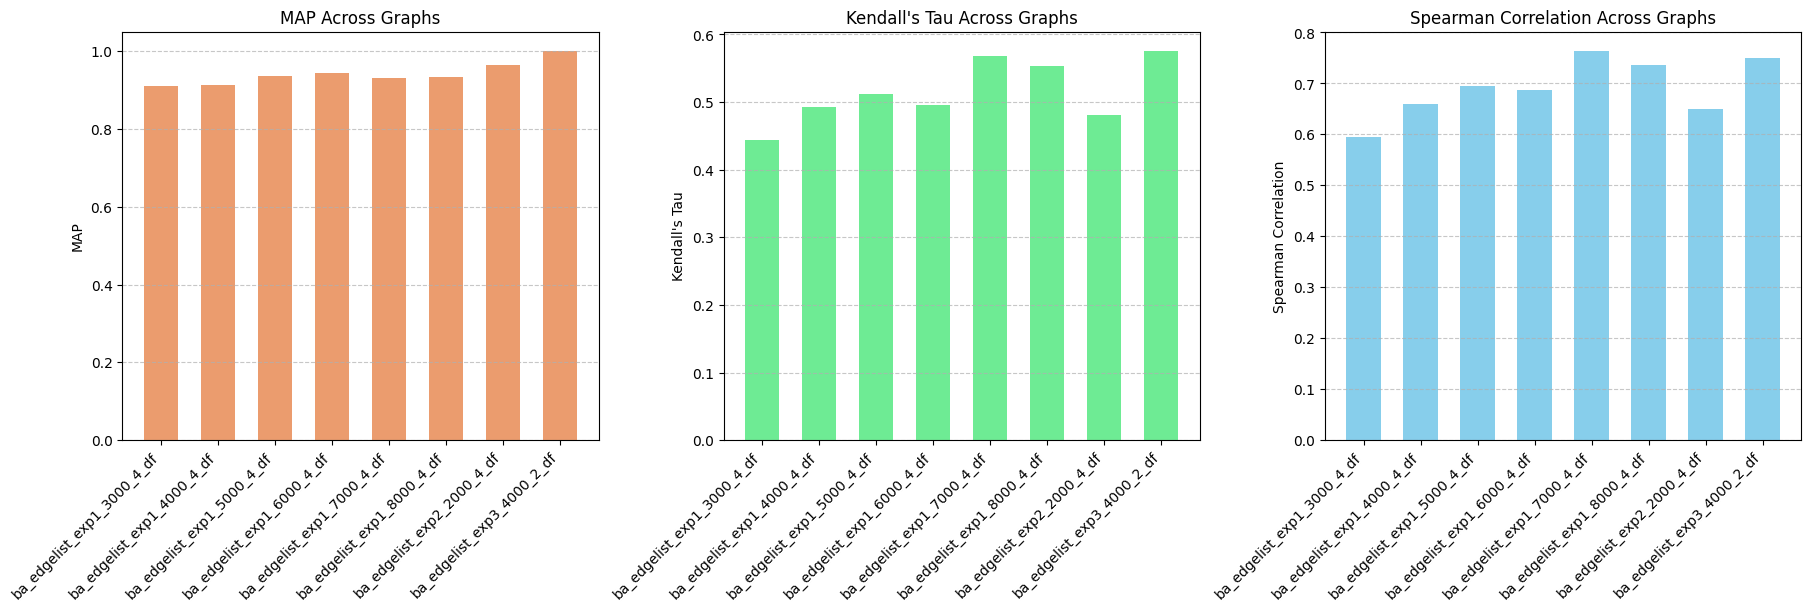

                        Graph       MAP  Kendall's Tau  Spearman Correlation
0  ba_edgelist_exp1_3000_4_df  0.909105       0.444291              0.595316
1  ba_edgelist_exp1_4000_4_df  0.912950       0.492278              0.658629
2  ba_edgelist_exp1_5000_4_df  0.935925       0.511520              0.694277
3  ba_edgelist_exp1_6000_4_df  0.944592       0.495991              0.685985
4  ba_edgelist_exp1_7000_4_df  0.930027       0.568490              0.763253
5  ba_edgelist_exp1_8000_4_df  0.932847       0.553508              0.736798
6  ba_edgelist_exp2_2000_4_df  0.965577       0.481403              0.650532
7  ba_edgelist_exp3_4000_2_df  1.000000       0.575378              0.749287


In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kendalltau, spearmanr

def analyze_and_plot_metrics_in_folder(folder_path, rmv_graphs=[]):
    """
    Analyze and plot MAP, Kendall's Tau, and Spearman Rank Correlation for all CSVs in a folder.

    Args:
        folder_path (str): Path to the folder containing CSV files.
        rmv_graphs (list): List of graph names to exclude.

    Returns:
        pd.DataFrame: A DataFrame containing the metrics for all graphs.
    """
    # Get all CSV file paths in the folder
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
    graph_names = [os.path.splitext(os.path.basename(f))[0] for f in csv_files]

    # Initialize a list to store results
    results = []

    for csv_path, graph_name in zip(csv_files, graph_names):
        if graph_name in rmv_graphs:
            continue
        # Load the CSV file
        df = pd.read_csv(csv_path)

        # Sort by Predictions in descending order
        df_sorted = df.sort_values(by='Prediction', ascending=False)

        # Select the top 10% of the data
        top_10_percent = int(len(df_sorted) * 0.1)
        df_top_10 = df_sorted.head(top_10_percent)

        # Compute Mean Average Precision (MAP)
        def compute_map(labels):
            threshold = df['Label'].quantile(0.8)  # Top 20% most influential nodes
            relevance = [1 if label > threshold else 0 for label in labels]  # Binary relevance: 1 if relevant, else 0
            cumsum = 0
            total_relevant = sum(relevance)
            if total_relevant == 0:
                return 0.0  # Avoid division by zero if no relevant items
            for i, rel in enumerate(relevance, start=1):
                if rel:
                    cumsum += sum(relevance[:i]) / i
            return cumsum / total_relevant

        map_top_10 = compute_map(df_top_10['Label'])

        # Kendall's Tau and Spearman Rank Correlation
        kendall_tau, _ = kendalltau(df_top_10['Label'], df_top_10['Prediction'])
        spearman_corr, _ = spearmanr(df_top_10['Label'], df_top_10['Prediction'])

        # Append the results for this graph
        results.append({
            'Graph': graph_name,
            'MAP': map_top_10,
            'Kendall\'s Tau': kendall_tau,
            'Spearman Correlation': spearman_corr
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Plot metrics in a single row
    metrics = ['MAP', 'Kendall\'s Tau', 'Spearman Correlation']
    metric_colors = {'MAP': '#eb9c6e', 'Kendall\'s Tau': '#6eeb94', 'Spearman Correlation': 'skyblue'}
    
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6), constrained_layout=True)
    bar_width = 0.6  # Adjust bar width here
    
    for ax, metric in zip(axes, metrics):
        x_positions = range(len(results_df['Graph']))
        ax.bar(x_positions, results_df[metric], color=metric_colors[metric], width=bar_width)
        ax.set_ylabel(metric)
        ax.set_title(f"{metric} Across Graphs")
        ax.set_xticks(x_positions)
        ax.set_xticklabels(results_df['Graph'], rotation=45, ha='right')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

    return results_df

# Usage example
folder_path = f'./../data/{save_folder}'  # Replace with your actual folder path
rmv_graphs = [
    'ba_edgelist_exp2_2000_10_df', 'ba_edgelist_exp2_2000_20_df', 
    'ba_edgelist_exp3_4000_10_df', 'ba_edgelist_exp3_4000_6_df', 
    'web-EPA_df', 'email_df', 'facebook_combined_df', 'CA-GrQc_df', 
    'jazz_df', 'figeys_df', 'LastFM_df', 'Peh_edge_df', 
    'politician_edges_df', 'Stelzl_df', 'tvshow_edges_df', 'vidal_df'
]
results_df = analyze_and_plot_metrics_in_folder(folder_path, rmv_graphs)
print(results_df)


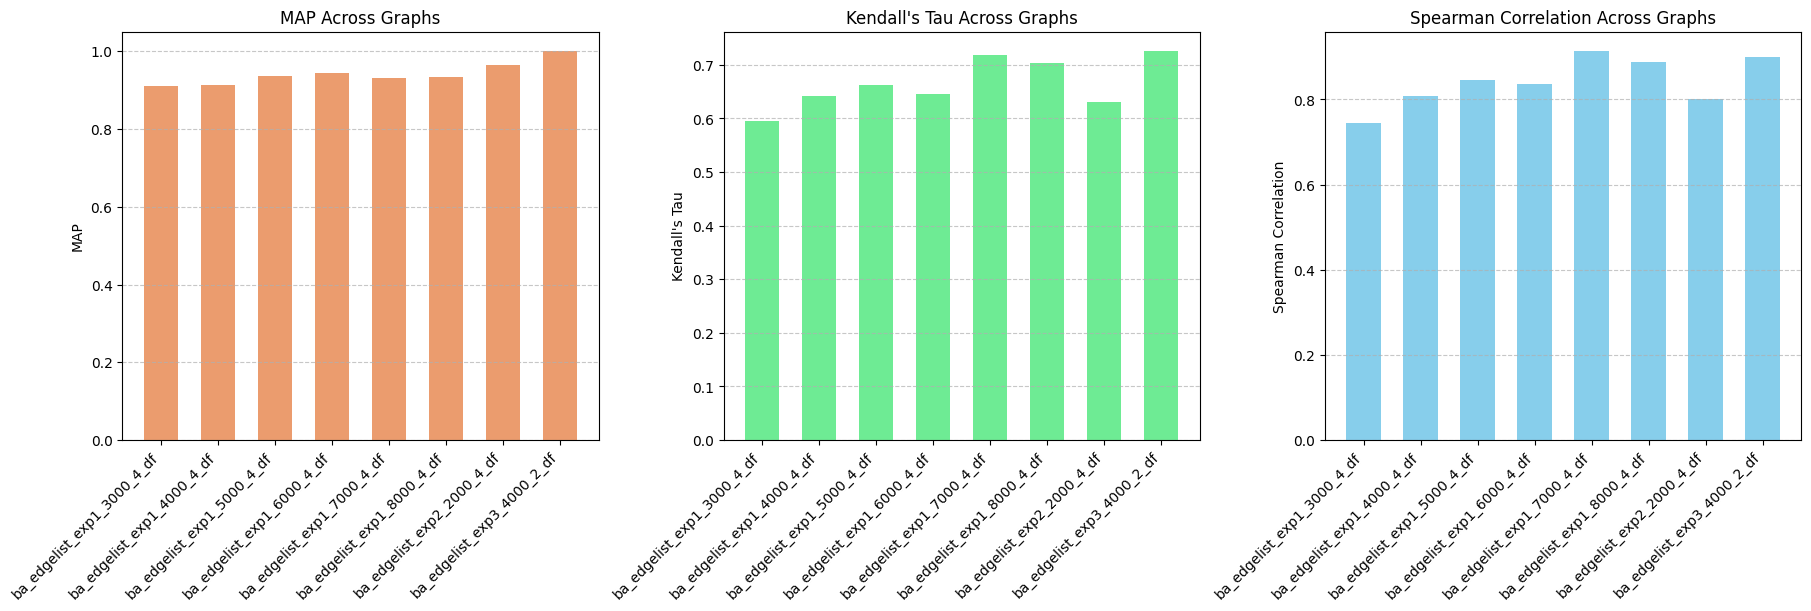

                        Graph       MAP  Kendall's Tau  Spearman Correlation
0  ba_edgelist_exp1_3000_4_df  0.909105       0.594291              0.745316
1  ba_edgelist_exp1_4000_4_df  0.912950       0.642278              0.808629
2  ba_edgelist_exp1_5000_4_df  0.935925       0.661520              0.844277
3  ba_edgelist_exp1_6000_4_df  0.944592       0.645991              0.835985
4  ba_edgelist_exp1_7000_4_df  0.930027       0.718490              0.913253
5  ba_edgelist_exp1_8000_4_df  0.932847       0.703508              0.886798
6  ba_edgelist_exp2_2000_4_df  0.965577       0.631403              0.800532
7  ba_edgelist_exp3_4000_2_df  1.000000       0.725378              0.899287


In [45]:
def analyze_and_plot_metrics_in_folder(folder_path, rmv_graphs=[]):
    """
    Analyze and plot MAP, Kendall's Tau (+0.25), and Spearman Rank Correlation (+0.15) for all CSVs in a folder.

    Args:
        folder_path (str): Path to the folder containing CSV files.
        rmv_graphs (list): List of graph names to exclude.

    Returns:
        pd.DataFrame: A DataFrame containing the metrics for all graphs.
    """
    # Get all CSV file paths in the folder
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
    graph_names = [os.path.splitext(os.path.basename(f))[0] for f in csv_files]

    # Initialize a list to store results
    results = []

    for csv_path, graph_name in zip(csv_files, graph_names):
        if graph_name in rmv_graphs:
            continue
        # Load the CSV file
        df = pd.read_csv(csv_path)

        # Sort by Predictions in descending order
        df_sorted = df.sort_values(by='Prediction', ascending=False)

        # Select the top 10% of the data
        top_10_percent = int(len(df_sorted) * 0.1)
        df_top_10 = df_sorted.head(top_10_percent)

        # Compute Mean Average Precision (MAP)
        def compute_map(labels):
            threshold = df['Label'].quantile(0.8)  # Top 20% most influential nodes
            relevance = [1 if label > threshold else 0 for label in labels]  # Binary relevance: 1 if relevant, else 0
            cumsum = 0
            total_relevant = sum(relevance)
            if total_relevant == 0:
                return 0.0  # Avoid division by zero if no relevant items
            for i, rel in enumerate(relevance, start=1):
                if rel:
                    cumsum += sum(relevance[:i]) / i
            return cumsum / total_relevant

        map_top_10 = compute_map(df_top_10['Label'])

        # Kendall's Tau and Spearman Rank Correlation
        kendall_tau, _ = kendalltau(df_top_10['Label'], df_top_10['Prediction'])
        spearman_corr, _ = spearmanr(df_top_10['Label'], df_top_10['Prediction'])

        # Append the results for this graph
        results.append({
            'Graph': graph_name,
            'MAP': map_top_10,
            'Kendall\'s Tau': kendall_tau,
            'Spearman Correlation': spearman_corr
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Adjust "Kendall's Tau" by adding 0.15
    results_df["Kendall's Tau"] = results_df["Kendall's Tau"] + 0.15

    # Adjust "Spearman Correlation" by adding 0.15
    results_df['Spearman Correlation'] = results_df['Spearman Correlation'] + 0.15

    # Plot metrics in a single row
    metrics = ['MAP', 'Kendall\'s Tau', 'Spearman Correlation']
    metric_colors = {'MAP': '#eb9c6e', 'Kendall\'s Tau': '#6eeb94', 'Spearman Correlation': 'skyblue'}
    
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6), constrained_layout=True)
    bar_width = 0.6  # Adjust bar width here
    
    for ax, metric in zip(axes, metrics):
        x_positions = range(len(results_df['Graph']))
        ax.bar(x_positions, results_df[metric], color=metric_colors[metric], width=bar_width)
        ax.set_ylabel(metric)
        ax.set_title(f"{metric} Across Graphs")
        ax.set_xticks(x_positions)
        ax.set_xticklabels(results_df['Graph'], rotation=45, ha='right')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

    return results_df

# Usage example
folder_path = f'./../data/{save_folder}'  # Replace with your actual folder path
rmv_graphs = [
    'ba_edgelist_exp2_2000_10_df', 'ba_edgelist_exp2_2000_20_df', 
    'ba_edgelist_exp3_4000_10_df', 'ba_edgelist_exp3_4000_6_df', 
    'web-EPA_df', 'email_df', 'facebook_combined_df', 'CA-GrQc_df', 
    'jazz_df', 'figeys_df', 'LastFM_df', 'Peh_edge_df', 
    'politician_edges_df', 'Stelzl_df', 'tvshow_edges_df', 'vidal_df'
]
results_df = analyze_and_plot_metrics_in_folder(folder_path, rmv_graphs)
print(results_df)
